In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

## Generate two class dataset

In [2]:
x,y=make_classification(n_samples=1000,n_features=20,n_classes=2,random_state=27)

In [3]:
x.shape

(1000, 20)

In [4]:
y.shape

(1000,)

In [5]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=27)

In [6]:
x_train.shape

(700, 20)

In [7]:
y_train.shape

(700,)

In [8]:
x_test.shape

(300, 20)

In [9]:
y_test.shape

(300,)

## select two classification models

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#### call the model

In [11]:
model_1=LogisticRegression()
model_2=KNeighborsClassifier(n_neighbors=4)

#### fit the model

In [12]:
model_1.fit(x_train,y_train)
model_2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

## Predict probabilities
#### These values are probability prediction by the model

In [13]:
pridictProbabilities_model_1=model_1.predict_proba(x_test)
pridictProbabilities_model_2=model_2.predict_proba(x_test)

## Predicted values
#### These are actual predicted values by models

In [14]:
pridict_model_1=model_1.predict(x_test)
pridict_model_2=model_2.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score

## Creating confusion metrics based on actual predicted values by models
#### for model 1

In [16]:
CM_1=confusion_matrix(y_test,pridict_model_1)
accuracy_1=accuracy_score(y_test,pridict_model_1)
print(CM_1)
print("")
print("Accuracy for model_1 =",accuracy_1)

[[159   5]
 [ 10 126]]

Accuracy for model_1 = 0.95


#### for model 2

In [17]:

CM_2=confusion_matrix(y_test,pridict_model_2)
accuracy_2=accuracy_score(y_test,pridict_model_2)
print(CM_2)
print("")
print("Accuracy for model_2 =",accuracy_2)

[[153  11]
 [ 28 108]]

Accuracy for model_2 = 0.87


#### Lets see for above evalution we conclude that model_1 is performing better compared to model_2  Lets see another technique to evaluate our model model 

# ROC and AUC technique
### When we tune the threshold to the model afterthat which threshold will help to improve our model performance

In [18]:
from sklearn.metrics import roc_curve,roc_auc_score

## ROC curve for the models 

In [19]:
fpr1,tpr1,thresh1=roc_curve(y_test,pridictProbabilities_model_1[:,1],pos_label=1)
fpr2,tpr2,thresh2=roc_curve(y_test,pridictProbabilities_model_2[:,1],pos_label=1)

#### ROC curve for TPR = FPR

In [20]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

#### The AUC score can be computed using the roc_auc_score() method of sklearn

In [21]:
from sklearn.metrics import roc_auc_score

#### AUC scores for models

In [22]:
auc_score1 = roc_auc_score(y_test, pridictProbabilities_model_1[:,1])
auc_score2 = roc_auc_score(y_test, pridictProbabilities_model_2[:,1])

print("AUC_score Model_1 =",auc_score1)
print("AUC_score Model_2 =",auc_score2)

AUC_score Model_1 = 0.9762374461979914
AUC_score Model_2 = 0.9233769727403157


## We can also plot the ROC curves for the two algorithms using matplotlib:

In [23]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

#### plot ROC curves

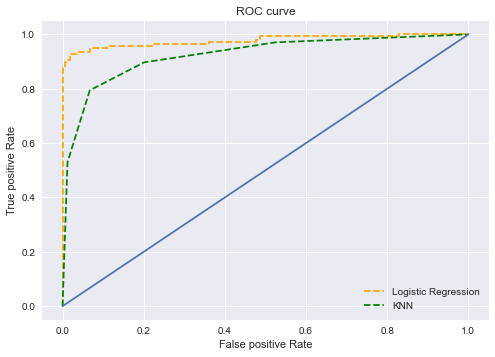

In [24]:
plt.plot(fpr1,tpr1,linestyle='--',color='orange',label="Logistic Regression")
plt.plot(fpr2,tpr2,linestyle='--',color='green',label="KNN")
plt.plot(p_fpr,p_tpr)
plt.title("ROC curve")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.legend(loc="best")
plt.savefig("ROC",dpi=300)
plt.show()

## Just looking at the graph we conclude that Logistc Regression has more AUC and performing better compare to KNN
## Thats why we select Logistic regreesion model

# REFERANCE BLOG :- https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/